# Credit Card Approval Prediction

Credit score cards are widely used in the financial industry as a risk control measure. They leverage personal information and data provided by credit card applicants to assess the likelihood of potential defaults and credit card borrowings in the future. Based on this analysis, banks can determine whether to approve a credit card for the applicant. Credit scores offer an objective way to quantify the level of risk associated with each individual. <br>

Here I create a comparison of machine learning models to predict if an applicant can be approved for a credit card proposal.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
os.environ['KAGGLE_USERNAME'] = "izzazzhr"
os.environ['KAGGLE_KEY'] = ""

In [ ]:
!kaggle competitions download -c DM2021MidFinalSisfoUnhas

  0% 0.00/648k [00:00<?, ?B/s]
100% 648k/648k [00:00<00:00, 43.4MB/s]
  0% 0.00/1.49M [00:00<?, ?B/s]
100% 1.49M/1.49M [00:00<00:00, 101MB/s]
  0% 0.00/108k [00:00<?, ?B/s]
100% 108k/108k [00:00<00:00, 109MB/s]


In [ ]:
!unzip -q /content/test.csv.zip

In [ ]:
!unzip -q /content/train.csv.zip

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

## Pre-processing Data Train

In [ ]:
train.head()

,Unnamed: 0,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,0,Female,1950-01-12,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0,"9767 Snyder Summit Suite 944\r\nWest Jesse, FL...",erinfox@jones.info,16.0,NBF,5,NaN,1.0,R
1,1,Male,1965-01-08,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0,"89313 Christina Divide\r\nGarciatown, ME 71630",ykoch@gmail.com,2.0,PUB,47,S,1.0,I
2,2,Female,1997-12-31,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0,"896 Benjamin Shore Suite 035\r\nSamuelhaven, T...",wolfekayla@mills.com,13.0,PVT,189,NaN,1.0,I
3,3,Male,1963-01-09,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0,"706 Crystal Roads\r\nNorth Marcus, NE 73557",ejackson@taylor.net,16.0,NBF,5,NaN,1.0,R
4,4,Female,1996-01-01,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1,"821 Sara Falls Apt. 775\r\nSouth Sarah, AZ 45554",cannonshawn@strong.com,99.0,BRO,5,NaN,1.0,R


### Show Attribute Details

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31655 entries, 0 to 31654
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            31655 non-null  int64  
 1   gender                31655 non-null  object 
 2   date_of_birth         31655 non-null  object 
 3   workclass             31655 non-null  object 
 4   education_level       31655 non-null  object 
 5   education_num         31655 non-null  float64
 6   marital_status        31655 non-null  object 
 7   occupation            31655 non-null  object 
 8   relationship          31655 non-null  object 
 9   capital_gain          31655 non-null  float64
 10  capital_loss          31655 non-null  float64
 11  hours_per_week        31655 non-null  float64
 12  approved              31655 non-null  int64  
 13  address               31655 non-null  object 
 14  email                 31655 non-null  object 
 15  inquiry_purpose_cod

### Remove Unused Attributes

In [ ]:
train = train.drop(['address','email', 'Unnamed: 0'],axis=1)

###Handle Missing Value

In [ ]:
train.isnull().sum()

gender                      0
date_of_birth               0
workclass                   0
education_level             0
education_num               0
marital_status              0
occupation                  0
relationship                0
capital_gain                0
capital_loss                0
hours_per_week              0
approved                    0
inquiry_purpose_code      917
institute_type              0
account_type                0
asset_class_cd          25008
asset_code                 63
portfolio_type              3
dtype: int64

In [ ]:
## Drop variabel yang memiliki nilai null terlalu banyak
train.drop(['asset_class_cd'], axis=1, inplace = True)

In [ ]:
train.dtypes

gender                   object
date_of_birth            object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
approved                  int64
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_code              float64
portfolio_type           object
dtype: object

In [ ]:
#Menanganani missing value numerik
#Mengisi missing value dengan nilai mean
train = train.fillna(train.mean())
train.isnull().sum()

gender                  0
date_of_birth           0
workclass               0
education_level         0
education_num           0
marital_status          0
occupation              0
relationship            0
capital_gain            0
capital_loss            0
hours_per_week          0
approved                0
inquiry_purpose_code    0
institute_type          0
account_type            0
asset_code              0
portfolio_type          3
dtype: int64

In [ ]:
##Menangani missing value kategorik
##Mengisi missing value dengan value yang paling sering muncul
for col in train:
    if train[col].dtypes == 'object':
        train = train.fillna(train[col].value_counts().index[0])

In [ ]:
train.isnull().sum()

gender                  0
date_of_birth           0
workclass               0
education_level         0
education_num           0
marital_status          0
occupation              0
relationship            0
capital_gain            0
capital_loss            0
hours_per_week          0
approved                0
inquiry_purpose_code    0
institute_type          0
account_type            0
asset_code              0
portfolio_type          0
dtype: int64

### Label Encoding

In [ ]:
## Mengubah tanggal lahir menjadi umur
from datetime import datetime, date

def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month,
                                      today.day) < (born.month,
                                                    born.day))

In [ ]:
train['date_of_birth'] = train['date_of_birth'].apply(age)

In [ ]:
train.head()

,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type
0,Female,71,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0,16.0,NBF,5,1.0,R
1,Male,56,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0,2.0,PUB,47,1.0,I
2,Female,23,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0,13.0,PVT,189,1.0,I
3,Male,58,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0,16.0,NBF,5,1.0,R
4,Female,25,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1,99.0,BRO,5,1.0,R


In [ ]:
cat_columns = train.columns[(train.dtypes =='object').values].tolist()
cat_columns

['gender',
 'workclass',
 'education_level',
 'marital_status',
 'occupation',
 'relationship',
 'institute_type',
 'portfolio_type']

In [ ]:
#Konversi data non-numerik menjadi numerik
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        train[col] = globals()['LE_{}'.format(col)].fit_transform(train[col])
train.head()

,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type
0,0,71,1,11,9.0,6,0,1,0.0,0.0,12.0,0,16.0,5,5,1.0,4
1,1,56,2,8,11.0,2,6,0,0.0,0.0,20.0,0,2.0,6,47,1.0,2
2,0,23,2,8,11.0,4,8,1,0.0,0.0,30.0,0,13.0,7,189,1.0,2
3,1,58,1,15,10.0,6,3,1,6849.0,0.0,40.0,0,16.0,5,5,1.0,4
4,0,25,4,9,13.0,2,9,2,0.0,0.0,20.0,1,99.0,0,5,1.0,4


### Split data

In [ ]:
features = train.drop(['approved'], axis=1)
label = train['approved']

In [ ]:
features

,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type
0,0,71,1,11,9.0,6,0,1,0.0,0.0,12.0,16.000000,5,5,1.0,4
1,1,56,2,8,11.0,2,6,0,0.0,0.0,20.0,2.000000,6,47,1.0,2
2,0,23,2,8,11.0,4,8,1,0.0,0.0,30.0,13.000000,7,189,1.0,2
3,1,58,1,15,10.0,6,3,1,6849.0,0.0,40.0,16.000000,5,5,1.0,4
4,0,25,4,9,13.0,2,9,2,0.0,0.0,20.0,99.000000,0,5,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31650,1,18,4,1,7.0,4,4,3,0.0,0.0,15.0,13.000000,7,5,1.0,4
31651,1,59,2,6,5.0,2,5,0,0.0,0.0,40.0,7.000000,7,5,1.0,4
31652,1,84,3,9,13.0,2,3,0,0.0,2392.0,55.0,99.000000,5,47,1.0,2
31653,0,51,2,1,7.0,0,7,4,0.0,0.0,40.0,29.024953,7,5,1.0,4


In [ ]:
label

0        0
1        0
2        0
3        0
4        1
        ..
31650    0
31651    0
31652    1
31653    0
31654    0
Name: approved, Length: 31655, dtype: int64

## Pre-processing Data Test

In [ ]:
 test.head(5)

,Index,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,0,Male,1996-12-31,Private,Some-college,10.0,Never-married,Exec-managerial,Not-in-family,0.0,0.0,40.0,"4310 Carr Keys Apt. 547\r\nNicoletown, MA 99102",krobinson@miller.com,13.0,PVT,47,S,1.0,I
1,1,Male,1988-01-03,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,38.0,"PSC 5755, Box 6774\r\nAPO AA 51628",jillwood@yahoo.com,99.0,PVT,5,NaN,1.0,R
2,2,Male,1970-01-07,Local-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,USS Spence\r\nFPO AA 93452,mhobbs@hotmail.com,99.0,PVT,189,NaN,1.0,I
3,3,Male,1995-01-01,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,"141 Dennis Bypass\r\nWest Tony, NC 22819",thill@gmail.com,99.0,PVT,5,NaN,1.0,R
4,4,Female,1983-01-04,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,0.0,0.0,30.0,"384 Christopher Pine\r\nLeemouth, OR 39895",ocarlson@yahoo.com,13.0,PVT,189,S,1.0,I


### Show Attribute Details

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13567 entries, 0 to 13566
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 13567 non-null  int64  
 1   gender                13567 non-null  object 
 2   date_of_birth         13567 non-null  object 
 3   workclass             13567 non-null  object 
 4   education_level       13567 non-null  object 
 5   education_num         13567 non-null  float64
 6   marital_status        13567 non-null  object 
 7   occupation            13567 non-null  object 
 8   relationship          13567 non-null  object 
 9   capital_gain          13567 non-null  float64
 10  capital_loss          13567 non-null  float64
 11  hours_per_week        13567 non-null  float64
 12  address               13567 non-null  object 
 13  email                 13567 non-null  object 
 14  inquiry_purpose_code  13193 non-null  float64
 15  institute_type     

### Remove Unused Attributes

In [ ]:
test = test.drop(['address','email', 'Index'],axis=1)

### Handle Missing Value

In [ ]:
test.isnull().sum()

gender                      0
date_of_birth               0
workclass                   0
education_level             0
education_num               0
marital_status              0
occupation                  0
relationship                0
capital_gain                0
capital_loss                0
hours_per_week              0
inquiry_purpose_code      374
institute_type              0
account_type                0
asset_class_cd          10722
asset_code                 19
portfolio_type              3
dtype: int64

In [ ]:
## Drop variabel yang memiliki nilai null terlalu banyak
test.drop(['asset_class_cd'], axis=1, inplace = True)

In [ ]:
test.isnull().sum()

gender                    0
date_of_birth             0
workclass                 0
education_level           0
education_num             0
marital_status            0
occupation                0
relationship              0
capital_gain              0
capital_loss              0
hours_per_week            0
inquiry_purpose_code    374
institute_type            0
account_type              0
asset_code               19
portfolio_type            3
dtype: int64

In [ ]:
#Menanganani missing value numerik
#Mengisi missing value dengan nilai mean
test = test.fillna(test.mean())
test.isnull().sum()

gender                  0
date_of_birth           0
workclass               0
education_level         0
education_num           0
marital_status          0
occupation              0
relationship            0
capital_gain            0
capital_loss            0
hours_per_week          0
inquiry_purpose_code    0
institute_type          0
account_type            0
asset_code              0
portfolio_type          3
dtype: int64

In [ ]:
##Menangani missing value kategorik
##Mengisi missing value dengan value yang paling sering muncul
for col in test:
    if test[col].dtypes == 'object':
        test = test.fillna(test[col].value_counts().index[0])

### Label Encoding

In [ ]:
test['date_of_birth'] = test['date_of_birth'].apply(age)

In [ ]:
cat_columns2 = test.columns[(test.dtypes =='object').values].tolist()
cat_columns2

['gender',
 'workclass',
 'education_level',
 'marital_status',
 'occupation',
 'relationship',
 'institute_type',
 'portfolio_type']

In [ ]:
#Konversi data non-numerik menjadi numerik
from sklearn.preprocessing import LabelEncoder

for col in cat_columns2:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        test[col] = globals()['LE_{}'.format(col)].fit_transform(test[col])
test.head()

,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type
0,1,24,2,15,10.0,4,3,1,0.0,0.0,40.0,13.0,7,47,1.0,2
1,1,33,2,11,9.0,2,5,0,0.0,0.0,38.0,99.0,7,5,1.0,4
2,1,51,1,12,14.0,2,9,0,0.0,0.0,45.0,99.0,7,189,1.0,2
3,1,26,2,11,9.0,2,2,0,0.0,0.0,40.0,99.0,7,5,1.0,4
4,0,38,2,11,9.0,0,7,1,0.0,0.0,30.0,13.0,7,189,1.0,2


In [ ]:
test.shape

(13567, 16)

In [ ]:
train.shape

(31655, 17)

## Training Models

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state = 75)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(features, label)

print('Logistic Model Accuracy : ', log_model.score(x_test, y_test)*100, '%')

prediction = log_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

Logistic Model Accuracy :  80.19270257463276 %

Confusion matrix :
[[4483  270]
 [ 984  594]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4753
           1       0.69      0.38      0.49      1578

    accuracy                           0.80      6331
   macro avg       0.75      0.66      0.68      6331
weighted avg       0.79      0.80      0.78      6331



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test, y_test)*100, '%')

prediction = decision_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

Decision Tree Model Accuracy :  84.96288106144368 %

Confusion matrix :
[[4450  303]
 [ 649  929]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4753
           1       0.75      0.59      0.66      1578

    accuracy                           0.85      6331
   macro avg       0.81      0.76      0.78      6331
weighted avg       0.84      0.85      0.84      6331



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train, y_train)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test, y_test)*100, '%')

prediction = RandomForest_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

Random Forest Model Accuracy :  85.84741746959406 %

Confusion matrix :
[[4513  240]
 [ 656  922]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4753
           1       0.79      0.58      0.67      1578

    accuracy                           0.86      6331
   macro avg       0.83      0.77      0.79      6331
weighted avg       0.85      0.86      0.85      6331



### SVM

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train, y_train)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test, y_test)*100, '%')

prediction = svc_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

Support Vector Classifier Accuracy :  79.81361554256831 %

Confusion matrix :
[[4609  144]
 [1134  444]]

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4753
           1       0.76      0.28      0.41      1578

    accuracy                           0.80      6331
   macro avg       0.78      0.63      0.64      6331
weighted avg       0.79      0.80      0.76      6331



### K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 88)

knn_model.fit(x_train, y_train)

print('KNN Model Accuracy : ', knn_model.score(x_test, y_test)*100, '%')

prediction = knn_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

KNN Model Accuracy :  83.5728952772074 %

Confusion matrix :
[[4601  152]
 [ 888  690]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4753
           1       0.82      0.44      0.57      1578

    accuracy                           0.84      6331
   macro avg       0.83      0.70      0.73      6331
weighted avg       0.83      0.84      0.82      6331



### XGBoost

In [ ]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train, y_train)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test, y_test)*100, '%')

prediction = XGB_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

XGBoost Model Accuracy :  86.62138682672563 %

Confusion matrix :
[[4520  233]
 [ 614  964]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4753
           1       0.81      0.61      0.69      1578

    accuracy                           0.87      6331
   macro avg       0.84      0.78      0.80      6331
weighted avg       0.86      0.87      0.86      6331



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(x_train, y_train)

print('XGBoost Model Accuracy : ', nb_model.score(x_test, y_test)*100, '%')

prediction = nb_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

XGBoost Model Accuracy :  80.28747433264887 %

Confusion matrix :
[[4530  223]
 [1025  553]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4753
           1       0.71      0.35      0.47      1578

    accuracy                           0.80      6331
   macro avg       0.76      0.65      0.67      6331
weighted avg       0.79      0.80      0.78      6331



### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb_model = AdaBoostClassifier(n_estimators=400, random_state=0)

adb_model.fit(x_train, y_train)

print('AdaBoost Model Accuracy : ', adb_model.score(x_test, y_test)*100, '%')

prediction = adb_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

AdaBoost Model Accuracy :  87.60069499289212 %

Confusion matrix :
[[4488  265]
 [ 520 1058]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4753
           1       0.80      0.67      0.73      1578

    accuracy                           0.88      6331
   macro avg       0.85      0.81      0.82      6331
weighted avg       0.87      0.88      0.87      6331



### GDBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gdb_model = GradientBoostingClassifier(n_estimators=400, random_state=0)

gdb_model.fit(x_train, y_train)

print('GradientBoost Model Accuracy : ', gdb_model.score(x_test, y_test)*100, '%')

prediction = gdb_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

GradientBoost Model Accuracy :  88.02716790396462 %

Confusion matrix :
[[4500  253]
 [ 505 1073]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4753
           1       0.81      0.68      0.74      1578

    accuracy                           0.88      6331
   macro avg       0.85      0.81      0.83      6331
weighted avg       0.88      0.88      0.88      6331



### Light GBM

In [ ]:
from lightgbm import LGBMClassifier


lgbm_model = LGBMClassifier()

lgbm_model.fit(x_train, y_train)

print('Light GBM Model Accuracy : ', lgbm_model.score(x_test, y_test)*100, '%')

prediction = lgbm_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

Light GBM Model Accuracy :  87.91660085294582 %

Confusion matrix :
[[4491  262]
 [ 503 1075]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4753
           1       0.80      0.68      0.74      1578

    accuracy                           0.88      6331
   macro avg       0.85      0.81      0.83      6331
weighted avg       0.88      0.88      0.88      6331



### CatBoost (Final Model)

In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [ ]:
import catboost
from catboost import CatBoostClassifier

ctb_model = CatBoostClassifier(verbose=0, n_estimators=400)

ctb_model.fit(x_train, y_train)

print('CatBoost Model Accuracy : ', ctb_model.score(x_test, y_test)*100, '%')

prediction = ctb_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))

print('\nClassification report:')
print(classification_report(y_test, prediction))

CatBoost Model Accuracy :  88.16932554098878 %

Confusion matrix :
[[4486  267]
 [ 482 1096]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4753
           1       0.80      0.69      0.75      1578

    accuracy                           0.88      6331
   macro avg       0.85      0.82      0.83      6331
weighted avg       0.88      0.88      0.88      6331



## Validation

In [ ]:
#K-Fold Validation dengan k = 5

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(5)

### Logistic Regression

In [ ]:
results=cross_val_score(log_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[80.44542726 80.30326963 80.3664508  80.01895435 80.16111199] 

80.25904280524404


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Decision Tree

In [ ]:
results=cross_val_score(decision_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[84.45743169 85.16821987 84.48902227 84.91549518 84.85231401] 

84.776496604012


### Random Forest

In [ ]:
results=cross_val_score(RandomForest_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[85.86321276 85.98957511 85.49992102 85.67366925 85.94218923] 

85.79371347338494


### SVM

In [ ]:
results=cross_val_score(svc_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[79.81361554 79.92418259 79.13441794 79.26078029 79.76622966] 

79.57984520612857


### KNN

In [ ]:
results=cross_val_score(knn_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[82.59358711 83.03585532 82.59358711 82.54620123 82.98846944] 

82.75154004106776


### XGBoost

In [ ]:
results=cross_val_score(XGB_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[86.4634339  86.84252093 86.35286685 86.13173274 86.70036329] 

86.49818354130468


### Naive Bayes

In [ ]:
results=cross_val_score(nb_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[79.13441794 80.30326963 79.52930027 79.19759912 80.03474964] 

79.63986731953877


### AdaBoost

In [ ]:
results=cross_val_score(adb_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[87.1426315  87.42694677 87.30058443 86.82672564 87.39535618] 

87.21844890222714


### GDB

In [ ]:
results=cross_val_score(gdb_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[87.25319855 88.09034908 87.45853736 87.11104091 88.12193966] 

87.60701311009319


###Light GBM

In [ ]:
results=cross_val_score(lgbm_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[87.23740325 87.66387616 87.15842679 86.76354446 88.16932554] 

87.39851524245775


### CatBoost

In [ ]:
results=cross_val_score(ctb_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[87.23740325 87.64808087 87.41115148 87.19001737 88.24830201] 

87.546990996683


## Applying Prediction Model

### Random Forest

In [ ]:
RandomForest_model.predict(test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_rf = pd.DataFrame()
df_rf['approved'] = RandomForest_model.predict(test)
df_rf.index.name = "index"

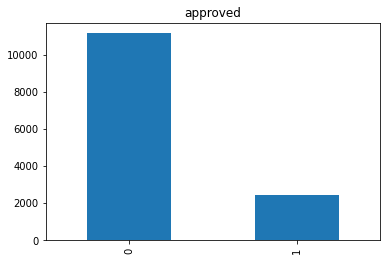

In [ ]:
df_rf['approved'].value_counts().plot(kind='bar', title='approved')

In [ ]:
df_rf['approved'].value_counts()

0    11139
1     2428
Name: approved, dtype: int64

In [ ]:
#df_rf.to_csv(r'/content/drive/MyDrive/05/Data Mining/Project Final/rf_submission.csv', index = False)

### XGBoost

In [ ]:
XGB_model.predict(test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_xgb = pd.DataFrame()
df_xgb['approved'] = XGB_model.predict(test)
df_xgb.index.name = "index"

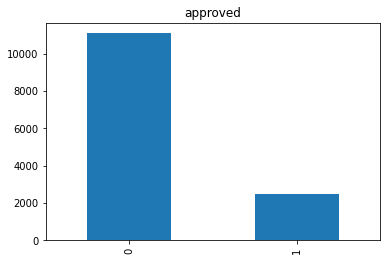

In [ ]:
df_xgb['approved'].value_counts().plot(kind='bar', title='approved')

In [ ]:
df_xgb['approved'].value_counts()

0    11086
1     2481
Name: approved, dtype: int64

In [ ]:
#df_xgb.to_csv(r'/content/drive/MyDrive/05/Data Mining/Project Final/XGB_submission.csv')

### Decision Tree

In [ ]:
decision_model.predict(test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_dt = pd.DataFrame()
df_dt['approved'] = decision_model.predict(test)
df_dt.index.name = "index"

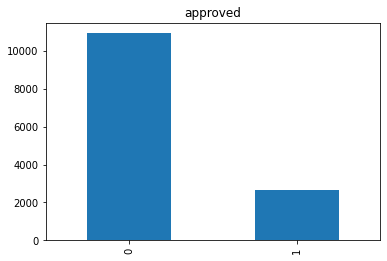

In [ ]:
df_dt['approved'].value_counts().plot(kind='bar', title='approved')

In [ ]:
df_dt['approved'].value_counts()

0    10918
1     2649
Name: approved, dtype: int64

In [ ]:
#df_dt.to_csv(r'/content/drive/MyDrive/05/Data Mining/Project Final/decisiontree_submission.csv')

### Logistic Regression

In [ ]:
log_model.predict(test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_log = pd.DataFrame()
df_log['approved'] = log_model.predict(test)
df_log.index.name = "index"

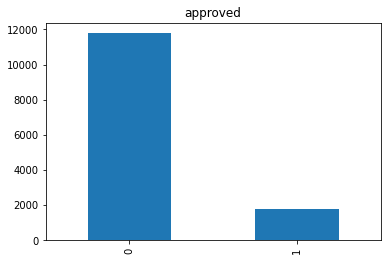

In [ ]:
df_log['approved'].value_counts().plot(kind='bar', title='approved')

In [ ]:
df_log['approved'].value_counts()

0    11772
1     1795
Name: approved, dtype: int64

In [ ]:
#df_log.to_csv(r'/content/drive/MyDrive/05/Data Mining/Project Final/lr_submission.csv')

### SVM

In [ ]:
svc_model.predict(test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_svm = pd.DataFrame()
df_svm['approved'] = svc_model.predict(test)
df_svm.index.name = "index"

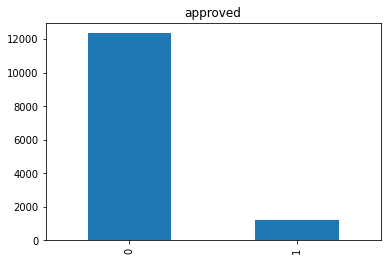

In [ ]:
df_svm['approved'].value_counts().plot(kind='bar', title='approved')

In [ ]:
df_svm['approved'].value_counts()

0    12353
1     1214
Name: approved, dtype: int64

In [ ]:
#df_svm.to_csv(r'/content/drive/MyDrive/05/Data Mining/Project Final/svm_submission.csv')

### KNN

In [ ]:
knn_model.predict(test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_knn = pd.DataFrame()
df_knn['approved'] = knn_model.predict(test)
df_knn.index.name = "index"

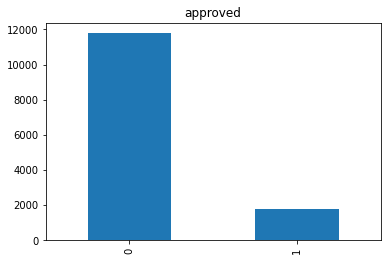

In [ ]:
df_knn['approved'].value_counts().plot(kind='bar', title='approved')

In [ ]:
df_knn['approved'].value_counts()

0    11777
1     1790
Name: approved, dtype: int64

In [ ]:
#df_knn.to_csv(r'/content/drive/MyDrive/05/Data Mining/Project Final/knn_submission.csv')

### Naive Bayes

In [ ]:
nb_model.predict(test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_nb = pd.DataFrame()
df_nb['approved'] = nb_model.predict(test)
df_nb.index.name = "index"

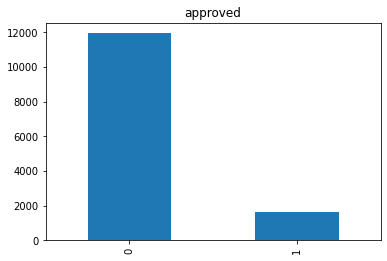

In [ ]:
df_nb['approved'].value_counts().plot(kind='bar', title='approved')

In [ ]:
df_nb['approved'].value_counts()

0    11940
1     1627
Name: approved, dtype: int64

In [ ]:
#df_nb.to_csv(r'/content/drive/MyDrive/05/Data Mining/Project Final/nb_submission.csv')

### AdaBoost

In [ ]:
adb_model.predict(test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_adb = pd.DataFrame()
df_adb['approved'] = adb_model.predict(test)
df_adb.index.name = "index"

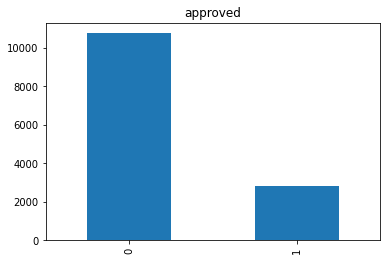

In [ ]:
df_adb['approved'].value_counts().plot(kind='bar', title='approved')

In [ ]:
df_adb['approved'].value_counts()

0    10751
1     2816
Name: approved, dtype: int64

In [ ]:
#df_adb.to_csv(r'/content/drive/MyDrive/05/Data Mining/Project Final/adb_submission.csv')

### GDB

In [ ]:
gdb_model.predict(test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_gdb = pd.DataFrame()
df_gdb['approved'] = gdb_model.predict(test)
df_gdb.index.name = "index"

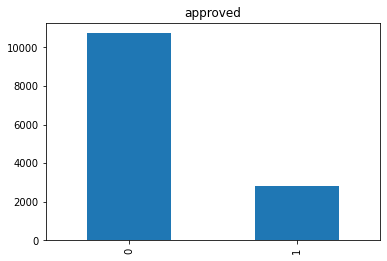

In [ ]:
df_gdb['approved'].value_counts().plot(kind='bar', title='approved')

In [ ]:
df_gdb['approved'].value_counts()

0    10730
1     2837
Name: approved, dtype: int64

In [ ]:
#df_gdb.to_csv(r'/content/drive/MyDrive/05/Data Mining/Project Final/gdb_submission.csv')

### Light GBM

In [ ]:
lgbm_model.predict(test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_lgbm = pd.DataFrame()
df_lgbm['approved'] = lgbm_model.predict(test)
df_lgbm.index.name = "index"

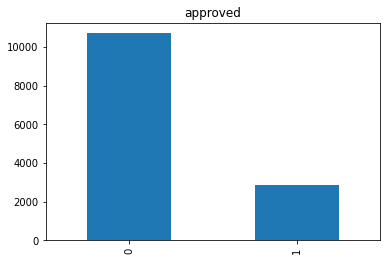

In [ ]:
df_lgbm['approved'].value_counts().plot(kind='bar', title='approved')

In [ ]:
df_lgbm['approved'].value_counts()

0    10700
1     2867
Name: approved, dtype: int64

In [ ]:
#df_lgbm.to_csv(r'/content/drive/MyDrive/05/Data Mining/Project Final/lgbm_submission.csv')

### CatBoost (Final Model)

In [ ]:
ctb_model.predict(test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_ctb = pd.DataFrame()
df_ctb['approved'] = ctb_model.predict(test)
df_ctb.index.name = "index"

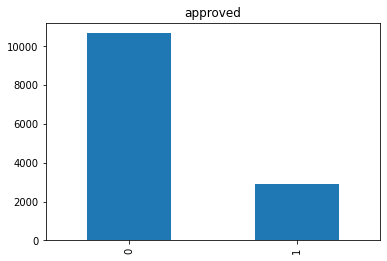

In [ ]:
df_ctb['approved'].value_counts().plot(kind='bar', title='approved')

In [ ]:
df_ctb['approved'].value_counts()

0    10674
1     2893
Name: approved, dtype: int64

In [ ]:
#df_ctb.to_csv(r'/content/drive/MyDrive/05/Data Mining/Project Final/ctb_submission.csv')